# Statistics

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob 
import pickle
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set('notebook', 'white')

df_all_ = None
for result_file in glob('data/results/*.npy'):
    print(result_file)
    with open(result_file, 'rb') as f:
        result = pickle.load(f)
    dataset = result_file.split('/')[-1].rsplit('.', 2)[0]
    is_graph_dataset = 'graph' in dataset
    is_cooccurrence_dataset = 'cooccurrence' in dataset
    dataset_name = dataset
    if is_graph_dataset:
        result['relabeled'] = 'relabeled' in result_file
        result['wl_iteration'] = int(dataset.split('.')[-1])
        parts = dataset.split('_')
        if is_cooccurrence_dataset:
            dataset_name = parts[-1].split('_')[0].split('.')[0]
            result['words'] = parts[4]
            result['window_size'] = parts[3]
        # GML
        else:
            dataset_name = parts[3].split('.')[0]
            result['words'] = 'concepts'
        result['type'] = 'cooccurrence' if is_cooccurrence_dataset else 'concept-graph'
    else:
        result['type'] = 'text'
        dataset_name = dataset.split('_')[1]
        result['words'] = ['all' if x['preprocessing'] != None else 'only-nouns'  for x in result['params']]
        #result['words'] = result['params']['preprocessing']
    for param in result['params']:
        del param['clf']
    if dataset_name.endswith('-single'):
        dataset_name = dataset_name.rsplit('-', 1)[0]
    del result['param_clf']
    result['dataset'] = dataset_name
    result_df = pd.DataFrame(result).sort_values(by = 'dataset', ascending = False)
    if df_all_ is None:
        df_all_ = result_df
    else:
        df_all_ = df_all_.append(result_df)
#df_all['window_size'].fillna('concept-graph', inplace = True)

data/results/dataset_graph_cooccurrence_1_all_ling-spam.phi.npy.0.results.npy
data/results/dataset_graph_cooccurrence_1_all_ling-spam.phi.npy.1.results.npy
data/results/dataset_graph_cooccurrence_1_all_ling-spam.phi.npy.2.results.npy
data/results/dataset_graph_cooccurrence_1_all_ling-spam.phi.npy.3.results.npy
data/results/dataset_graph_cooccurrence_1_all_ling-spam.phi.npy.4.results.npy
data/results/dataset_graph_cooccurrence_1_all_ng20.phi.npy.0.results.npy
data/results/dataset_graph_cooccurrence_1_all_ng20.phi.npy.1.results.npy
data/results/dataset_graph_cooccurrence_1_all_ng20.phi.npy.2.results.npy
data/results/dataset_graph_cooccurrence_1_all_ng20.phi.npy.3.results.npy
data/results/dataset_graph_cooccurrence_1_all_ng20.phi.npy.4.results.npy
data/results/dataset_graph_cooccurrence_1_all_relabeled_ling-spam.phi.npy.0.results.npy
data/results/dataset_graph_cooccurrence_1_all_relabeled_ling-spam.phi.npy.1.results.npy
data/results/dataset_graph_cooccurrence_1_all_relabeled_ling-spam.phi

data/results/dataset_graph_cooccurrence_2_all_reuters-21578.phi.npy.0.results.npy
data/results/dataset_graph_cooccurrence_2_all_reuters-21578.phi.npy.1.results.npy
data/results/dataset_graph_cooccurrence_2_all_reuters-21578.phi.npy.2.results.npy
data/results/dataset_graph_cooccurrence_2_all_reuters-21578.phi.npy.3.results.npy
data/results/dataset_graph_cooccurrence_2_all_reuters-21578.phi.npy.4.results.npy
data/results/dataset_graph_cooccurrence_2_all_webkb.phi.npy.0.results.npy
data/results/dataset_graph_cooccurrence_2_all_webkb.phi.npy.1.results.npy
data/results/dataset_graph_cooccurrence_2_all_webkb.phi.npy.2.results.npy
data/results/dataset_graph_cooccurrence_2_all_webkb.phi.npy.3.results.npy
data/results/dataset_graph_cooccurrence_2_all_webkb.phi.npy.4.results.npy
data/results/dataset_graph_cooccurrence_2_only-nouns_ling-spam.phi.npy.0.results.npy
data/results/dataset_graph_cooccurrence_2_only-nouns_ling-spam.phi.npy.1.results.npy
data/results/dataset_graph_cooccurrence_2_only-nou

data/results/dataset_graph_cooccurrence_3_only-nouns_relabeled_webkb.phi.npy.0.results.npy
data/results/dataset_graph_cooccurrence_3_only-nouns_relabeled_webkb.phi.npy.1.results.npy
data/results/dataset_graph_cooccurrence_3_only-nouns_relabeled_webkb.phi.npy.2.results.npy
data/results/dataset_graph_cooccurrence_3_only-nouns_relabeled_webkb.phi.npy.3.results.npy
data/results/dataset_graph_cooccurrence_3_only-nouns_relabeled_webkb.phi.npy.4.results.npy
data/results/dataset_graph_cooccurrence_3_only-nouns_reuters-21578.phi.npy.0.results.npy
data/results/dataset_graph_cooccurrence_3_only-nouns_reuters-21578.phi.npy.1.results.npy
data/results/dataset_graph_cooccurrence_3_only-nouns_reuters-21578.phi.npy.2.results.npy
data/results/dataset_graph_cooccurrence_3_only-nouns_reuters-21578.phi.npy.3.results.npy
data/results/dataset_graph_cooccurrence_3_only-nouns_reuters-21578.phi.npy.4.results.npy
data/results/dataset_graph_cooccurrence_3_only-nouns_webkb.phi.npy.0.results.npy
data/results/datase

In [7]:
df_all_[df_all_.dataset == 'ng20']

,dataset,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,mean_train_accuracy,mean_train_f1_macro,mean_train_precision_macro,...,std_test_precision_macro,std_test_recall_macro,std_train_accuracy,std_train_f1_macro,std_train_precision_macro,std_train_recall_macro,type,window_size,wl_iteration,words
0,ng20,0.175589,0.126576,0.053009,0.005034,0.002650,0.050000,0.053009,0.005034,0.002650,...,0.000002,6.938894e-18,0.000024,0.000002,0.000001,6.938894e-18,cooccurrence,1,0.0,all
1,ng20,0.307394,0.180312,0.053009,0.005034,0.002650,0.050000,0.053009,0.005034,0.002650,...,0.000002,6.938894e-18,0.000024,0.000002,0.000001,6.938894e-18,cooccurrence,1,0.0,all
2,ng20,14.162094,5.879732,0.640985,0.633429,0.639345,0.631483,0.971427,0.971948,0.978308,...,0.005190,4.345299e-03,0.001036,0.002123,0.002589,1.055831e-03,cooccurrence,1,0.0,all
3,ng20,17.973856,1.919252,0.591903,0.552115,0.637426,0.575801,0.815528,0.806584,0.843037,...,0.003415,6.587796e-03,0.011569,0.013061,0.004753,1.340647e-02,cooccurrence,1,0.0,all
0,ng20,0.263779,0.175748,0.053009,0.005034,0.002650,0.050000,0.053009,0.005034,0.002650,...,0.000002,6.938894e-18,0.000024,0.000002,0.000001,6.938894e-18,cooccurrence,1,1.0,all
1,ng20,0.350424,0.204962,0.053009,0.005034,0.002650,0.050000,0.053009,0.005034,0.002650,...,0.000002,6.938894e-18,0.000024,0.000002,0.000001,6.938894e-18,cooccurrence,1,1.0,all
2,ng20,13.231315,4.737129,0.300966,0.295692,0.299019,0.295579,0.971665,0.974318,0.981432,...,0.005882,5.105736e-03,0.000803,0.000560,0.000188,7.942604e-04,cooccurrence,1,1.0,all
3,ng20,8.082369,4.425550,0.244720,0.219824,0.331087,0.240939,0.710031,0.722260,0.838382,...,0.007895,9.050858e-03,0.032925,0.035928,0.014956,3.446789e-02,cooccurrence,1,1.0,all
0,ng20,0.140124,0.109834,0.053009,0.005034,0.002650,0.050000,0.053009,0.005034,0.002650,...,0.000002,6.938894e-18,0.000024,0.000002,0.000001,6.938894e-18,cooccurrence,1,2.0,all
1,ng20,0.787539,0.149267,0.053009,0.005034,0.002650,0.050000,0.053009,0.005034,0.002650,...,0.000002,6.938894e-18,0.000024,0.000002,0.000001,6.938894e-18,cooccurrence,1,2.0,all


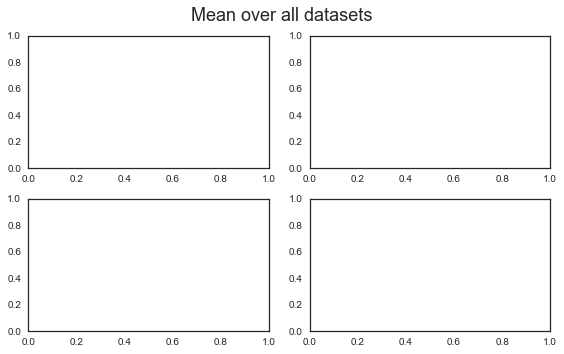

In [9]:
sns.set('notebook', 'white')
def plot_distributions(df, title = None, figsize = (8, 5)):
    fig, axes_indexed = plt.subplots(nrows = 2, ncols=2, figsize = figsize)

    axes = []
    for ax_row in axes_indexed:
        axes += list(ax_row)
    for val, ax in zip(['wl_iteration', 'window_size', 'words', 'type'], axes):
        if len(df.groupby(val).size()) == 0:
            continue
        df.groupby(val).mean_test_score.mean().plot(kind = 'barh', ax = ax, xlim = (0, 1))
        ax.set_xlabel('f1 macro score')
    plt.suptitle(title, size = 18)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    return fig, axes
    
df_all = df_all_.groupby('dataset').filter(lambda x: len(x.type.value_counts()) == 3).reset_index(drop=True)
fig, _  = plot_distributions(df_all, title = 'Mean over all datasets')
fig.savefig('tmp/results/all.png', dpi = 100)
plt.show()
plt.close(fig)
for name, df_dataset in df_all.groupby('dataset'):
    if len(df_dataset.type.value_counts()) < 3:
        continue
    fig, _ = plot_distributions(df_dataset, title = 'Dataset: {}'.format(name))
    fig.savefig('tmp/results/dataset-{}.png'.format(name), dpi = 100)
    plt.show()
    plt.close(fig)


In [5]:
def plot_best_by_type(df_all, df, title = '', fontsize = 12, figsize = (5, 2), top = 0.85):
    fig, ax = plt.subplots(figsize = figsize)
    els = df_all.iloc[df['mean_test_score'].idxmax()]
    df['mean_test_score'].max().plot(kind = 'barh', ax = ax, xlim = (0, 1), xerr=els.std_test_score * 2)
    display(els.std_test_score)
    ax.set_xlabel('f1 score')
    for idx, x in els.iterrows():
        out = '{x.type:20}best f1-score: {x.mean_test_score:.4f}\twords: {x.words:14}'.format(x = x)
        if x.type != 'text':
            out += 'wl iteration: {x.wl_iteration:<8.0f} relabeled: {x.relabeled:<6}'.format(x = x)
        else:
            out += 'stop words:   {}'.format(x.params["count_vectorizer__stop_words"])
        if x.type == 'cooccurrence':
            out += 'window_size: {x.window_size}'.format(x = x)
        print(out)
    fig.suptitle(title, fontsize = fontsize)
    fig.tight_layout()
    fig.subplots_adjust(top = top)
    return fig, ax

for name, df_dataset in sorted(df_all.groupby('dataset'), key = lambda x: x[0]):
    df_dataset_grouped_by_type = df_dataset.groupby('type')
    print(name)
    fig, ax = plot_best_by_type(df_all, df_dataset_grouped_by_type, 'Dataset: {}'.format(name))
    fig.savefig('tmp/results/dataset-{}-best.png'.format(name), dpi = 150)
    plt.show()
    plt.close(fig)


In [6]:
df_by_ds = df_all[df_all.type != 'text'].groupby('dataset')

df_all.iloc[df_by_ds.mean_test_score.idxmax()]
df_all.columns

AttributeError: 'DataFrameGroupBy' object has no attribute 'mean_test_score'

In [ ]:
import json

with open('data/check-w2v-results.json') as f:
    w2v_results = json.load(f)
 
per_embedding_type = {}
for dataset, value in w2v_results.items():
    print(dataset)
    for embedding_raw, cache_files in sorted(value.items(), key = lambda x: x[0]):
        embedding = embedding_raw.split('/')[-1].rsplit('.', 2)[0]
        if len(cache_files.keys()) != 2: continue
        print('\t{}'.format(embedding))
        if embedding not in per_embedding_type:
            per_embedding_type[embedding] = {}
        per_embedding_type[embedding][dataset] = []
        for dataset_file, counts in sorted(cache_files.items(), key = lambda x: x[0]):
            not_found_ratio = int(counts['counts']['not_found'] / counts['num_labels'] * 100)
            if embedding == 'trained' and 'coo' in  dataset_file:
                print('Yes', counts['counts']['not_found'], not_found_ratio, '%', counts['not_found_sample'])
            is_gml = 'dataset_graph_gml' in dataset_file
            per_embedding_type[embedding][dataset].append((is_gml, not_found_ratio))
            print('\t\t{:4} missing  {:3>}%'.format('gml' if is_gml else 'co', not_found_ratio))
        per_embedding_type[embedding][dataset] = per_embedding_type[embedding][dataset][0][1]  #sum(y for x, y in per_embedding_type[embedding][dataset]) / 2
df = pd.DataFrame(per_embedding_type)
df#[df.index == "ng20"]

In [ ]:
import dataset_helper
import matplotlib.pyplot as plt

currently = ['ling-spam', 'webkb', 'ng20', 'reuters-21578']

for dataset in dataset_helper.get_all_available_dataset_names():
    if dataset in currently: continue
    print(dataset)
    continue
    X, Y = dataset_helper.get_dataset(dataset)
    dataset_helper.plot_dataset_class_distribution(X, Y, 'Class distribution: {}'.format(dataset))
    plt.show()
    print('{}\n#Docs:\t{}\t# Classes:\t{}'.format(dataset, len(X), len(set(Y))))